# Project : Predicting temperature around nuclear waste cannister

## KNN

Frank Djidingar Monbe 316435 and Sophie Tiberghien 282240

<hr style="clear:both">

This notebook is part of a machine learning project. The goal is to predict temperature of sensor around a nuclear waste cannister for different times. More information is available in the ReadMe file.

The purpose of this notebook is to apply the model KNN.

<hr style="clear:both">

## 1 - Importations


### Functions

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error

### Data

In [2]:
# Importing training and testing data from the data prossesing notebook
train_data = pd.read_csv('merged_data_train.csv')
test_data = pd.read_csv('merged_data_test.csv')

# Import training data

coordinates_train = pd.read_csv("data/TrainingData/Coordinates_Training.csv")
humidity_train = pd.read_csv("data/TrainingData/Training_data_humidity.csv")
pressure_train = pd.read_csv("data/TrainingData/Training_data_pressure.csv")
temperature_train_clean = pd.read_csv("temperature_train_clean.csv")

# Import testing data

coordinates_test = pd.read_csv("data/TestDataStudents/Coordinates_Test.csv")
humidity_test = pd.read_csv("data/TestDataStudents/Test_Time_humidity.csv")
pressure_test = pd.read_csv("data/TestDataStudents/Test_Time_pressure.csv")



## 2 - Features

When looking at the problem, we immediately thought about using KNN, because we have known temperature for certains sensors and when to predict other. KNN method can implemant taking the temperature of the closest sensor. In KNN it is important to choose well our features, we tried different combinaison and the one with the smallest L1 was using:  
pressure, humidity, coordinates and radius (we did not keep materials) 

In [3]:
# Training features
humidity_train_knn= train_data[['1554.0_x', '1556.0_x', '1558.0_x', '1560.0_x', '1563.0_x', '1567.0_x', '1572.0_x', '1578.0_x', '1585.0_x', '1595.0_x', '1606.0_x', '1621.0_x', '1639.0_x', '1662.0_x', '1690.0_x', '1726.0_x', '1770.0_x', '1826.0_x', '1895.0_x', '1982.0_x', '2090.0_x', '2226.0_x', '2395.0_x', '2607.0_x', '2871.0_x', '3202.0_x', '3616.0_x', '4133.0_x', '4779.0_x', '5587.0_x', '6597.0_x', '7028.0_x']]
pressure_train_knn = train_data[['1554.0_y', '1556.0_y', '1558.0_y', '1560.0_y', '1563.0_y', '1567.0_y', '1572.0_y', '1578.0_y', '1585.0_y', '1595.0_y', '1606.0_y', '1621.0_y', '1639.0_y', '1662.0_y', '1690.0_y', '1726.0_y', '1770.0_y', '1826.0_y', '1895.0_y', '1982.0_y', '2090.0_y', '2226.0_y', '2395.0_y', '2607.0_y', '2871.0_y', '3202.0_y', '3616.0_y', '4133.0_y', '4779.0_y', '5587.0_y', '6597.0_y', '7028.0_y']]
material_train_knn = train_data[['Material_BBLOCK','Material_CAN','Material_EDZ','Material_GBM','Material_OPA','Material_SHCR']]
coordinates_train_knn = train_data[['Coor X [m]', 'Coor Y [m]', 'Coor Z [m]']]
r_train_knn = train_data[['R [m]']]

# Testing features     
humidity_test_knn= test_data[['1554.0_x', '1556.0_x', '1558.0_x', '1560.0_x', '1563.0_x', '1567.0_x', '1572.0_x', '1578.0_x', '1585.0_x', '1595.0_x', '1606.0_x', '1621.0_x', '1639.0_x', '1662.0_x', '1690.0_x', '1726.0_x', '1770.0_x', '1826.0_x', '1895.0_x', '1982.0_x', '2090.0_x', '2226.0_x', '2395.0_x', '2607.0_x', '2871.0_x', '3202.0_x', '3616.0_x', '4133.0_x', '4779.0_x', '5587.0_x', '6597.0_x', '7028.0_x']]
pressure_test_knn = test_data[['1554.0_y', '1556.0_y', '1558.0_y', '1560.0_y', '1563.0_y', '1567.0_y', '1572.0_y', '1578.0_y', '1585.0_y', '1595.0_y', '1606.0_y', '1621.0_y', '1639.0_y', '1662.0_y', '1690.0_y', '1726.0_y', '1770.0_y', '1826.0_y', '1895.0_y', '1982.0_y', '2090.0_y', '2226.0_y', '2395.0_y', '2607.0_y', '2871.0_y', '3202.0_y', '3616.0_y', '4133.0_y', '4779.0_y', '5587.0_y', '6597.0_y', '7028.0_y']]
material_test_knn = test_data[['Material_BBLOCK','Material_CAN','Material_EDZ','Material_GBM','Material_OPA','Material_SHCR']]
coordinates_test_knn = test_data[['Coor X [m]', 'Coor Y [m]', 'Coor Z [m]']]
r_test_knn = test_data[['R [m]']]

X_train = pd.concat([humidity_train_knn, pressure_train_knn, coordinates_train_knn, r_train_knn], axis=1)
X_test = pd.concat([humidity_test_knn, pressure_test_knn, coordinates_test_knn, r_test_knn], axis=1)


y_train = train_data.iloc[:, 65:97 ] # Target (Temperature)



## 3 - Normalization

Since the each features have very different numbers it it important to normalize the data with X_train

In [4]:
# Compute the mean and standard deviation for each feature of the training set

mean = X_train.mean(axis=0)
std = X_train.std(axis=0)


# Implement the normalize function
def normalize(X: np.ndarray, mean: np.ndarray, std: np.ndarray):
    X_normalized = (X - mean) / std
   
    return X_normalized

# Normalize features of the training, val and test set using the mean and std of the training set features
X_train_normalize = normalize(X_train, mean, std)
X_test_normalize = normalize(X_test, mean, std)


In order to see if our method will perform well on unseen data, we are splitting our training into a training set with 80% of the training set and 20% will serve as a validation set to see if our model performs well.   
We tried different numbers of neighbors, type of distance and another parameter weights. This parameter allows temperatures to be weighted according to the nearest sensor. The nearest sensor will have a greater weight than the farthest of the chosen neighbors.
https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html

## 4 - Validation performance

In [5]:
# Split the data into training and test sets
X_train, X_test, y_train_actual, y_test_actual = train_test_split(X_train_normalize, y_train, test_size=0.2, random_state=42)

k = 3

models = []

# Train KNN models
for i in range(32):
    knn = KNeighborsRegressor(n_neighbors=k,metric='euclidean', weights ='distance')
    knn.fit(X_train, y_train_actual.iloc[:, i])
    models.append(knn)

# Predict the temperature for each target variable using the corresponding KNN model
y_pred = pd.DataFrame(index=X_test.index)
for i in range(32):
    y_pred['temperature_' + str(i)] = models[i].predict(X_test)

# Calculate mean squared error
mae = mean_absolute_error(y_test_actual, y_pred)
print("Mean absolute Error:", mae)


Mean absolute Error: 1.243201402701196


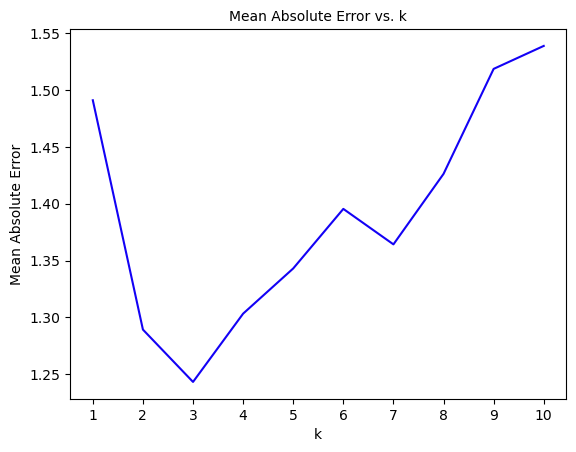

In [6]:
k_values = np.arange(1, 11)
mae_values = []

for k in k_values:
    models = []

    # Train KNN models
    for i in range(32):
        knn = KNeighborsRegressor(n_neighbors=k, metric='euclidean', weights='distance')
        knn.fit(X_train, y_train_actual.iloc[:, i])
        models.append(knn)

    # Predict the temperature for each target variable using the corresponding KNN model
    y_pred = pd.DataFrame(index=X_test.index)
    for i in range(32):
        y_pred['temperature_' + str(i)] = models[i].predict(X_test)

    # Calculate mean absolute error
    mae = mean_absolute_error(y_test_actual, y_pred)
    mae_values.append(mae)

# Plot the MAE values against k
plt.plot(k_values, mae_values, color='#1301F5')
plt.xticks(np.arange(1, 11),fontsize=10)
plt.xlabel('k',fontsize=10)
plt.ylabel('Mean Absolute Error',fontsize=10)
plt.title('Mean Absolute Error vs. k',fontsize=10)
plt.yticks(fontsize=10)
plt.show()

We see that for k=3 we have the lowest mean absolute error. That's why we choose this value for k.

## 5 - Temperature predictions 

Once we have analysed the performance on the validation set, we can apply the same method on the test set to predict the temperatures. We Use the whole trainiing set to maximize the performance.

In [7]:
k = 3
models = []
for i in range(32):
    knn = KNeighborsRegressor(n_neighbors=k,metric='euclidean', weights ='distance')
    knn.fit(X_train_normalize, y_train.iloc[:, i])
    models.append(knn)

# Predict the temperature
y_pred = pd.DataFrame(index=test_data.index)
for i in range(32):
    y_pred['temperature_' + str(i)] = models[i].predict(X_test_normalize)

y_pred = y_pred.T

### CSV file formatting

Once we have predicted the temperatures we need to prepare the csv file to be able to upload it on AIcrowd.

In [8]:
y_pred[' '] = [1554, 1556, 1558, 1560, 1563, 1567, 1572, 1578, 1585, 1595, 1606, 1621, 1639, 1662, 1690, 1726, 1770, 1826, 1895, 1982, 2090, 2226, 2395, 2607, 2871, 3202, 3616, 4133, 4779, 5587, 6597, 7028]


y_pred = y_pred.iloc[:, [-1] + list(range(y_pred.shape[1] - 1))]

# Get the column names as a list
column_names = y_pred.columns.tolist()

# create a list of new column names
new_columns = [" ", "N_901", "N_902", "N_903", "N_904", "N_905", "N_906", "N_907", "N_908", "N_910", "N_911", "N_912", "N_913", "N_914", "N_915", "N_916", "N_917", "N_918", "N_919", "N_920", "N_921", "N_922", "N_923", "N_924", "N_925", "N_926", "N_927", "N_928", "N_929", "N_930", "N_931", "N_932", "N_933", "N_934", "N_935", "N_936", "N_937", "N_938", "N_939", "N_940", "N_941", "N_942", "N_943", "N_944", "N_945", "N_946", "N_947", "N_948", "N_949", "N_950", "N_951", "N_952", "N_953", "N_954", "N_955", "N_956", "N_957", "N_958", "N_959", "N_960", "N_961", "N_962", "N_963", "N_964", "N_965", "N_966", "N_967", "N_968", "N_969", "N_970", "N_971", "N_972", "N_973", "N_974", "N_975", "N_976", "N_977", "N_978", "N_979", "N_980", "N_981", "N_982", "N_983", "N_984", "N_985", "N_986", "N_987", "N_988", "N_989", "N_990", "N_991", "N_992", "N_993", "N_994", "N_995", "N_996", "N_997", "N_998", "N_999", "N_1000", "N_1001", "N_1002", "N_1003", "N_1004", "N_1005", "N_1006", "N_1007", "N_1008", "N_1009", "N_1010", "N_1011", "N_1012", "N_1013", "N_1014", "N_1015", "N_1016", "N_1017", "N_1018", "N_1019", "N_1020", "N_1021", "N_1022", "N_1023", "N_1024", "N_1025", "N_1026", "N_1027", "N_1028", "N_1029", "N_1030", "N_1031", "N_1032", "N_1033", "N_1034", "N_1035", "N_1036", "N_1037", "N_1038", "N_1039", "N_1040", "N_1041", "N_1042", "N_1043", "N_1044", "N_1045", "N_1046"]

# create a dictionary with current column names and new column names
col_dict = {old_col: new_col for old_col, new_col in zip(y_pred.columns, new_columns)}

# rename the columns
y_pred.rename(columns=col_dict, inplace=True)
print(y_pred.shape)

(32, 146)


We check the shape of the example of submission file and compare it with our predicted temperatures. Then we can plot the predicted temperature to spot anomalies.

### Plotting

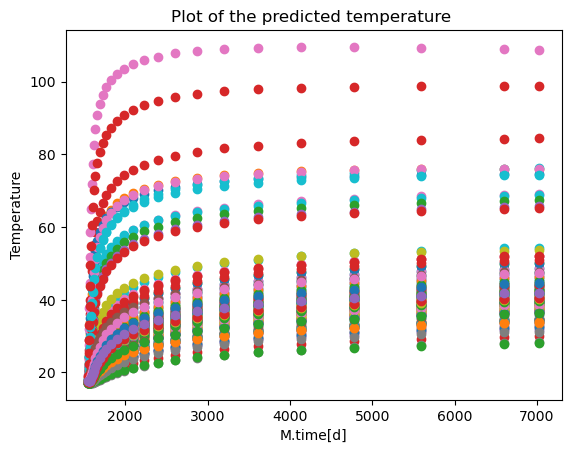

In [9]:
y_pred.to_csv('y_pred.csv', index=False)
predicted_temp = pd.read_csv('y_pred.csv')
#Visualizing all the temperature variation for all the point 
x_data = predicted_temp.iloc[:, 0]
y_data = predicted_temp.iloc[:, 1:]  # we want all the columns but the first
for i in range(y_data.shape[1]):
    plt.scatter(x_data, y_data.iloc[:, i], label=f"Column {i+1}")
plt.xlabel("M.time[d]")
plt.ylabel("Temperature")
plt.title('Plot of the predicted temperature ')
plt.show()

After ploting the predicted temperatures we can compare the realtion of the predicted temperature and material, pressure, humidity radius ... to the relation of the known temperature and these features

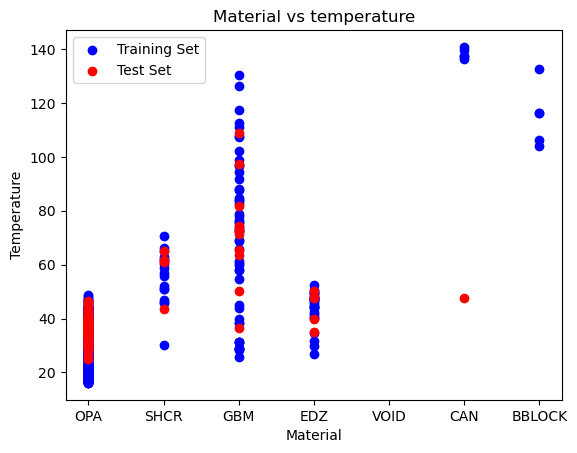

In [10]:
# Plotting training set data
x_mat_1 = coordinates_train.iloc[:, 3]
y_mat_1 = temperature_train_clean.iloc[25, 1:]  # we want all the columns but the first because it is the times

plt.scatter(x_mat_1, y_mat_1, color='blue', label='Training Set')

# Plotting test set data
x_mat_2 = coordinates_test.iloc[:, 3]
y_mat_2 = predicted_temp.iloc[25, 1:]  # we want all the columns but the first because it is the times

plt.scatter(x_mat_2, y_mat_2, color='red', label='Test Set')

plt.xlabel("Material")
plt.ylabel("Temperature")
plt.title('Material vs temperature')
plt.legend()
plt.show()

## 6 - Tackling point N_955

We can clearly see that the can material is not predicted well !!!, the temperature of this sensor (N_955) should be much higher. 
To tackle this problem we can look for sensor of the train set with the can material. After investigation, there is several sensor of CAN material, however some of them were deleted because of the missing values for humidity and pressure, so we only have 3 sensor that we can use. we are taking the mean of these three sensors for each time and putting it for sensor N_955

In [11]:
temp_clean = pd.read_csv('temperature_train_clean.csv')
selected_columns = ['N_854', 'N_880', 'N_899'] 
can_sensor= temp_clean[selected_columns]

In [12]:
mean_can = can_sensor.mean(axis=1) #We calculate the mean of each time
mean_can_list = mean_can.tolist()

In [13]:
column_name = 'N_955'
for i, row in predicted_temp.iterrows():
    predicted_temp.at[i, column_name] = mean_can_list[i]

predicted_temp.to_csv('predictions_knn.csv', index=False)

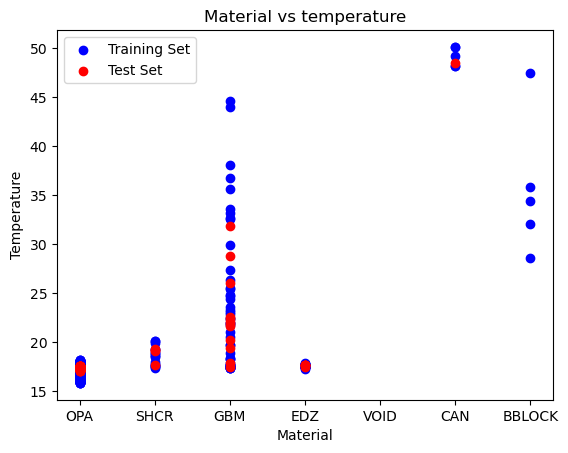

In [14]:
# Plotting training set data
x_hum_train = coordinates_train.iloc[:, 3]
y_hum_train = temperature_train_clean.iloc[3, 1:]  # we want all the columns but the first because it is the times

plt.scatter(x_hum_train, y_hum_train, color='blue', label='Training Set')

# Plotting test set data
x_hum_test = coordinates_test.iloc[:, 3]

y_hum_test = predicted_temp.iloc[3, 1:]  # we want all the columns but the first because it is the times
plt.scatter(x_hum_test, y_hum_test, color='red', label='Test Set')

plt.xlabel("Material")
plt.ylabel("Temperature")
plt.title('Material vs temperature')
plt.legend()
plt.show()

This is clearly better.

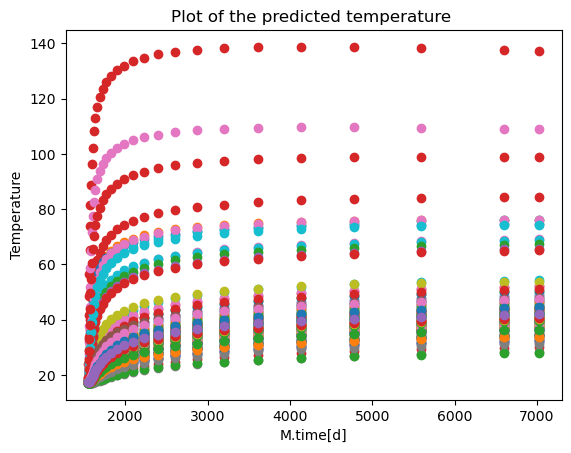

In [15]:
predicted_temp = pd.read_csv('predictions_knn.csv')
#Visualizing all the temperature variation for all the point 
x_data = predicted_temp.iloc[:, 0]
y_data = predicted_temp.iloc[:, 1:]  # we want all the columns but the first
for i in range(y_data.shape[1]):
    plt.scatter(x_data, y_data.iloc[:, i], label=f"Column {i+1}")
plt.xlabel("M.time[d]")
plt.ylabel("Temperature")
plt.title('Plot of the predicted temperature ')
plt.show()

## 7 - Final plots and conclusion

Now that we have modify, the temperature for sensor N_955 we can plot the relation of temperature with different features and compararing the training set and testing set

In [16]:
x_rad_1 = coordinates_train.iloc[:, 7]
y_rad_1 = temperature_train_clean.iloc[20, 1:] 
x_rad_2 = coordinates_test.iloc[:, 7]
y_rad_2 = predicted_temp.iloc[20, 1:]
x_x_1 = coordinates_train.iloc[:, 4]
y_x_1 = temperature_train_clean.iloc[20, 1:]
x_x_2 = coordinates_test.iloc[:, 4]
y_x_2 = predicted_temp.iloc[20, 1:] 
x_y_1 = coordinates_train.iloc[:, 5]
y_y_1 = temperature_train_clean.iloc[20, 1:]
x_y_2 = coordinates_test.iloc[:, 5]
y_y_2 = predicted_temp.iloc[20, 1:]
x_z_1 = coordinates_train.iloc[:, 6]
y_z_1 = temperature_train_clean.iloc[20, 1:]
x_z_2 = coordinates_test.iloc[:, 6]
y_z_2 = predicted_temp.iloc[20, 1:]
x_pres_train = pressure_train.iloc[20, 1:]
y_pres_train = temperature_train_clean.iloc[20, 1:]
x_pres_test = pressure_test.iloc[20, 1:]
y_pres_test = predicted_temp.iloc[20, 1:]
x_hum_train = humidity_train.iloc[20, 1:]
y_hum_train = temperature_train_clean.iloc[20, 1:] 
x_hum_test = humidity_test.iloc[20, 1:]
y_hum_test = predicted_temp.iloc[20, 1:]

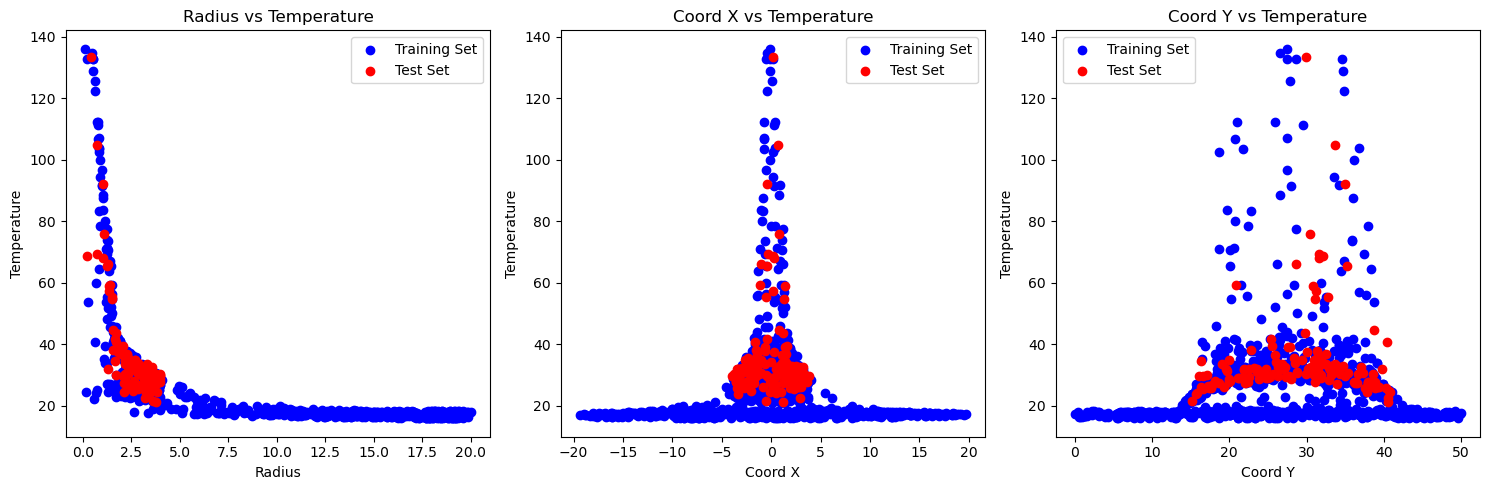

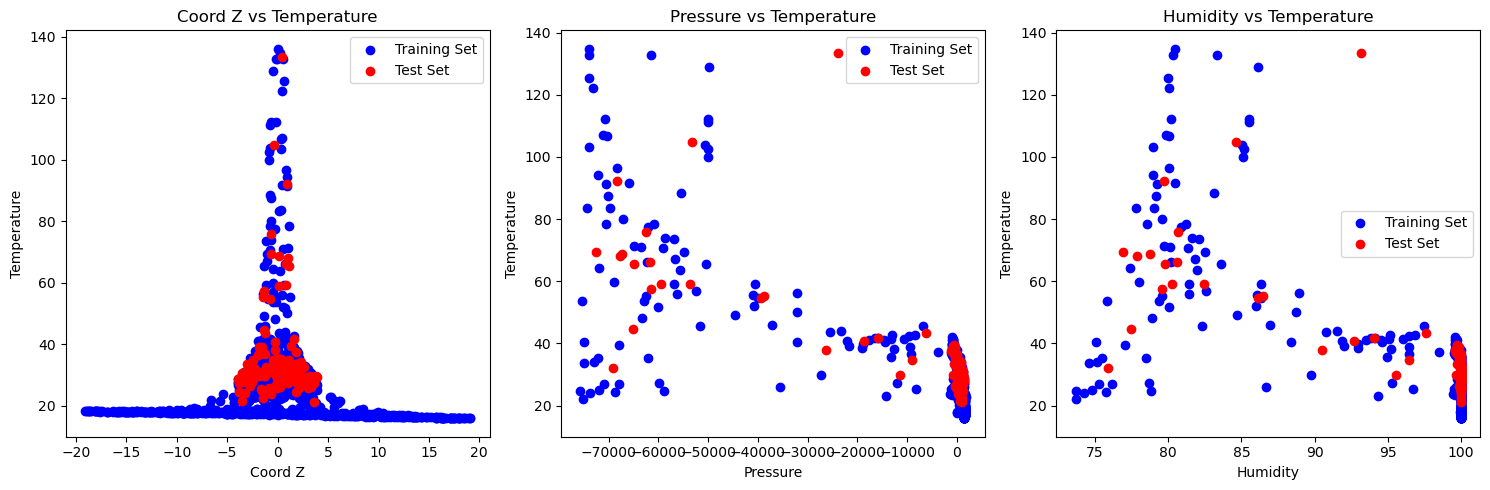

In [17]:
# First Row
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Plotting training set data - Radius vs Temperature
axes[0].scatter(x_rad_1, y_rad_1, color='blue', label='Training Set')
axes[0].scatter(x_rad_2, y_rad_2, color='red', label='Test Set')
axes[0].set_xlabel("Radius")
axes[0].set_ylabel("Temperature")
axes[0].set_title('Radius vs Temperature')
axes[0].legend()

# Plotting training set data - Coord X vs Temperature
axes[1].scatter(x_x_1, y_x_1, color='blue', label='Training Set')
axes[1].scatter(x_x_2, y_x_2, color='red', label='Test Set')
axes[1].set_xlabel("Coord X")
axes[1].set_ylabel("Temperature")
axes[1].set_title('Coord X vs Temperature')
axes[1].legend()

# Plotting training set data - Coord Y vs Temperature
axes[2].scatter(x_y_1, y_y_1, color='blue', label='Training Set')
axes[2].scatter(x_y_2, y_y_2, color='red', label='Test Set')
axes[2].set_xlabel("Coord Y")
axes[2].set_ylabel("Temperature")
axes[2].set_title('Coord Y vs Temperature')
axes[2].legend()

plt.tight_layout()
plt.show()

# Second Row
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Plotting training set data - Coord Z vs Temperature
axes[0].scatter(x_z_1, y_z_1, color='blue', label='Training Set')
axes[0].scatter(x_z_2, y_z_2, color='red', label='Test Set')
axes[0].set_xlabel("Coord Z")
axes[0].set_ylabel("Temperature")
axes[0].set_title('Coord Z vs Temperature')
axes[0].legend()

# Plotting training set data - Pressure vs Temperature
axes[1].scatter(x_pres_train, y_pres_train, color='blue', label='Training Set')
axes[1].scatter(x_pres_test, y_pres_test, color='red', label='Test Set')
axes[1].set_xlabel("Pressure")
axes[1].set_ylabel("Temperature")
axes[1].set_title('Pressure vs Temperature')
axes[1].legend()

# Plotting training set data - Humidity vs Temperature
axes[2].scatter(x_hum_train, y_hum_train, color='blue', label='Training Set')
axes[2].scatter(x_hum_test, y_hum_test, color='red', label='Test Set')
axes[2].set_xlabel("Humidity")
axes[2].set_ylabel("Temperature")
axes[2].set_title('Humidity vs Temperature')
axes[2].legend()

plt.tight_layout()
plt.show()

We can see that the outlier point on the graph pressure vs temperature and humidity vs pressure is the sensor N_955, this is probably why the temperature was not correctly predicted with the knn method and we had to modify it.

The final rating on Aicrowd was 1.2294 for L1 and 7.3497 for L2. Thanks to the modifying of sensor N_955 we were able to improve our L1 score from 1.71 to 1.22.